# Perovskite oxides 

Perovskite oxides are a group of materials with a distinct crystal structure resembling that of the mineral perovskite. They exhibit diverse properties such as superconductivity, magnetism, and catalytic activity due to their unique arrangement of atoms. These compounds have wide-ranging applications in electronics, energy storage, and catalysis.

In [2]:
# Importing important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import datasets
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")

In [3]:
#Loading dataset

dataset = pd.read_csv("aiml.csv")

In [4]:
dataset.head()

,A site #1,A site #2,A site #3,B site #1,B site #2,B site #3,Number of elements,energy_above_hull (meV/atom),formation_energy (eV/atom),num_of_atoms_host_Asite0,...,Asite_IsRareEarth_weighted_avg,Asite_NfUnfilled_weighted_avg,Asite_NfValence_weighted_avg,Bsite_At. #_weighted_avg,Bsite_IsMetal_weighted_avg,Bsite_NdUnfilled_weighted_avg,Bsite_NpUnfilled_weighted_avg,host_Asite0_IsBCC,host_Asite0_OrbitalD,host_Bsite0_IsHexagonal
0,Ba,Sr,NaN,V,NaN,NaN,4,29.747707,-2.113335,7,...,0.00,0.0,0.0,23.0,1.0,7.0,0.0,0,0,0
1,Ba,Bi,Pr,Co,NaN,NaN,5,106.702335,-1.311863,4,...,0.50,5.5,5.0,27.0,1.0,3.0,0.0,0,0,1
2,Ba,Ca,NaN,Fe,NaN,NaN,4,171.608093,-1.435607,6,...,0.00,0.0,0.0,26.0,1.0,4.0,0.0,0,0,0
3,Ba,Cd,Pr,Ni,NaN,NaN,5,284.898190,-0.868639,4,...,0.50,5.5,1.5,28.0,1.0,2.0,0.0,0,0,0
4,Ba,Dy,NaN,Fe,NaN,NaN,4,270.007913,-1.746806,6,...,0.75,3.0,7.5,26.0,1.0,4.0,0.0,0,0,0


In [5]:
dataset.shape

(1929, 59)

The number of rows and columns are 1929 and 59 respectively. 

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1929 entries, 0 to 1928
Data columns (total 59 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   A site #1                                            1929 non-null   object 
 1   A site #2                                            1161 non-null   object 
 2   A site #3                                            34 non-null     object 
 3   B site #1                                            1929 non-null   object 
 4   B site #2                                            1249 non-null   object 
 5   B site #3                                            33 non-null     object 
 6   Number of elements                                   1929 non-null   int64  
 7   energy_above_hull (meV/atom)                         1929 non-null   float64
 8   formation_energy (eV/atom)                           1929 non-null  

In [7]:
dataset.describe()

,Number of elements,energy_above_hull (meV/atom),formation_energy (eV/atom),num_of_atoms_host_Asite0,host_Asite0_Heat of Vaporization,host_Bsite0_at. wt.,host_Bsite0_Ionization Energy (kJ/mol),shannon_radii_AB_avg,Density_AB_avg,BCCefflatcnt_AB_avg,...,Asite_IsRareEarth_weighted_avg,Asite_NfUnfilled_weighted_avg,Asite_NfValence_weighted_avg,Bsite_At. #_weighted_avg,Bsite_IsMetal_weighted_avg,Bsite_NdUnfilled_weighted_avg,Bsite_NpUnfilled_weighted_avg,host_Asite0_IsBCC,host_Asite0_OrbitalD,host_Bsite0_IsHexagonal
count,1929.000000,1929.000000,1929.000000,1929.000000,1929.000000,1929.000000,1929.000000,1929.000000,1929.000000,1929.000000,...,1929.000000,1929.000000,1929.000000,1929.000000,1929.000000,1929.000000,1929.000000,1929.000000,1929.000000,1929.000000
mean,4.284085,105.532633,-1.914460,6.100570,270.521830,59.640178,705.063867,0.960641,6.097906,7.310155,...,0.380897,2.215073,1.003694,27.503499,0.999546,4.367548,0.267237,0.219285,0.354069,0.303784
std,0.535232,98.395552,0.570340,1.748812,116.946676,21.252029,56.529385,0.088519,1.112604,0.408719,...,0.420216,3.691948,1.627624,6.924673,0.023298,2.055959,1.034259,0.413869,0.478354,0.460010
min,3.000000,0.000000,-3.208500,3.000000,99.870000,24.305000,577.600000,0.742500,2.882500,6.355729,...,0.000000,0.000000,0.000000,13.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.000000,33.436112,-2.315473,4.000000,140.200000,51.996000,652.800000,0.893750,5.370000,6.958757,...,0.000000,0.000000,0.000000,24.375000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000
50%,4.000000,84.202506,-1.900529,6.000000,332.630000,55.847000,717.400000,0.960000,6.043750,7.272569,...,0.125000,0.000000,0.000000,26.000000,1.000000,4.125000,0.000000,0.000000,0.000000,0.000000
75%,5.000000,155.909864,-1.474341,8.000000,393.300000,58.933200,758.000000,1.017500,6.776875,7.602382,...,0.750000,4.000000,1.500000,27.875000,1.000000,5.500000,0.000000,0.000000,1.000000,1.000000
max,6.000000,956.831956,-0.488125,8.000000,399.570000,195.080000,906.400000,1.255000,13.095000,9.050862,...,1.000000,11.000000,11.000000,78.000000,1.500000,9.000000,5.000000,1.000000,1.000000,1.000000


In [8]:

dataset["A site #1"].value_counts().sort_values(ascending=False)

Ba    481
La    338
Pr    330
Sr    302
Y     258
Ca    136
Dy     19
Gd     19
Nd     19
Sm     19
Bi      4
Cd      1
Ho      1
Mg      1
Sn      1
Name: A site #1, dtype: int64

<Axes: title={'center': 'Count of different gender'}>

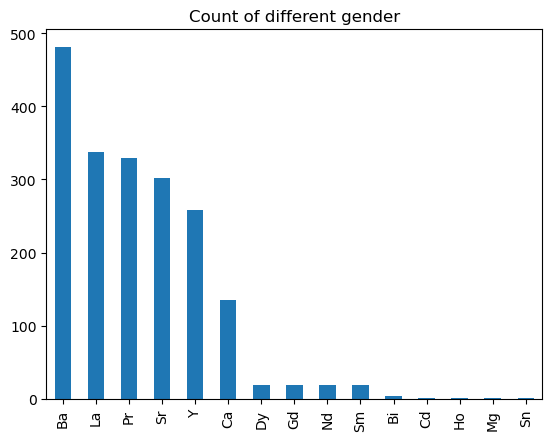

In [23]:
dataset['A site #1'].value_counts().plot(kind='bar',title="Count of different gender")

From the above garph we can infer that Barium is most repeating element and tin is least one. Lanthanum and Praseodymium also have good frequency

<Axes: title={'center': 'Count of different gender'}>

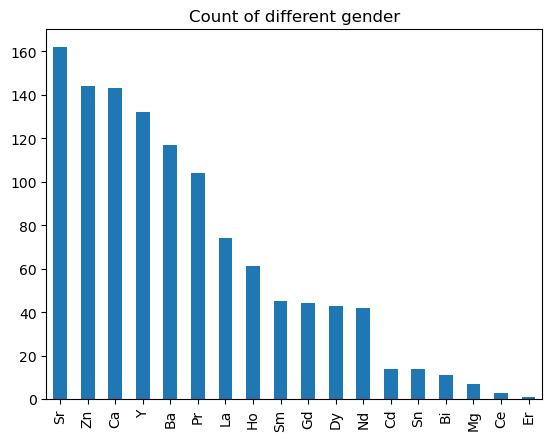

In [24]:
dataset['A site #2'].value_counts().plot(kind='bar',title="Count of different gender")

From the above garph we can infer that Strontium is most repeating element and Erbium is least one.  
 
    

<Axes: title={'center': 'Count of different gender'}>

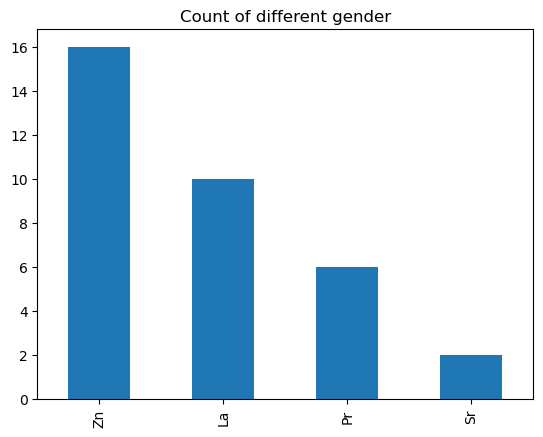

In [27]:
dataset['A site #3'].value_counts().plot(kind='bar',title="Count of different gender")

<Axes: title={'center': 'Count of different gender'}>

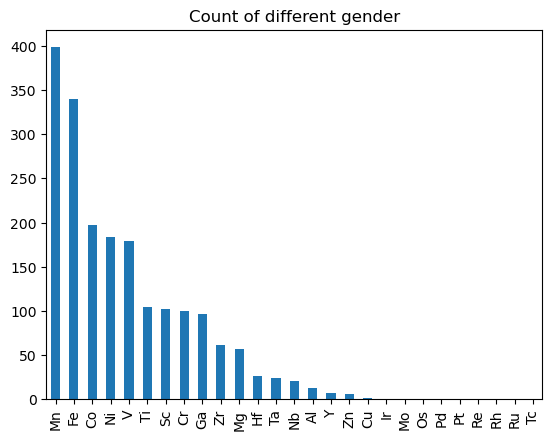

In [28]:
dataset['B site #1'].value_counts().plot(kind='bar',title="Count of different gender")

<Axes: title={'center': 'Count of different gender'}>

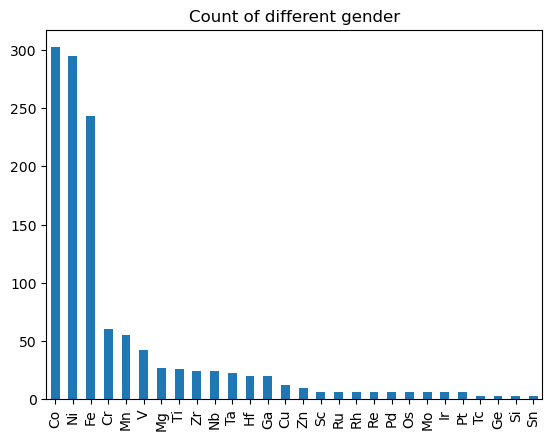

In [29]:
dataset['B site #2'].value_counts().plot(kind='bar',title="Count of different gender")

<Axes: title={'center': 'Count of different gender'}>

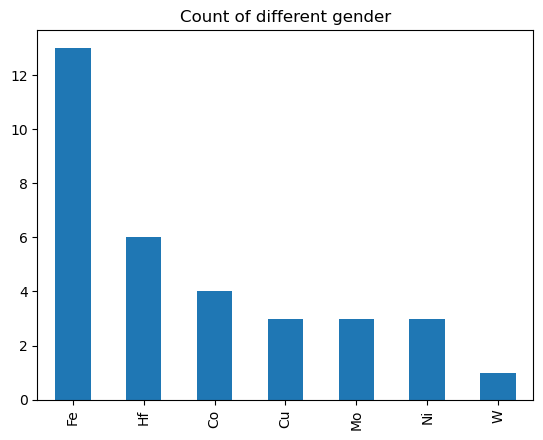

In [30]:
dataset['B site #3'].value_counts().plot(kind='bar',title="Count of different gender")

Now to remove categorical data we can use one hot encoding but this can result in increase in functionality. So we will apply one hot encoding to only top 7 most repeating elements.

In [7]:
def hot_end_enc(dato,variable):
    top_7 = [x for x in dato[variable].value_counts().sort_values(ascending=False).head(7).index]
    print(top_7)
    for label in top_7:
        dato[label] = np.where(dataset[variable]==label,1,0)
    
    return dataset[[variable]+top_7]
hot_end_enc(dataset,"A site #1")

['Ba', 'La', 'Pr', 'Sr', 'Y', 'Ca', 'Dy']


,A site #1,Ba,La,Pr,Sr,Y,Ca,Dy
0,Ba,1,0,0,0,0,0,0
1,Ba,1,0,0,0,0,0,0
2,Ba,1,0,0,0,0,0,0
3,Ba,1,0,0,0,0,0,0
4,Ba,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
1924,Y,0,0,0,0,1,0,0
1925,Y,0,0,0,0,1,0,0
1926,Y,0,0,0,0,1,0,0
1927,Y,0,0,0,0,1,0,0


<Axes: title={'center': 'Number of elements'}>

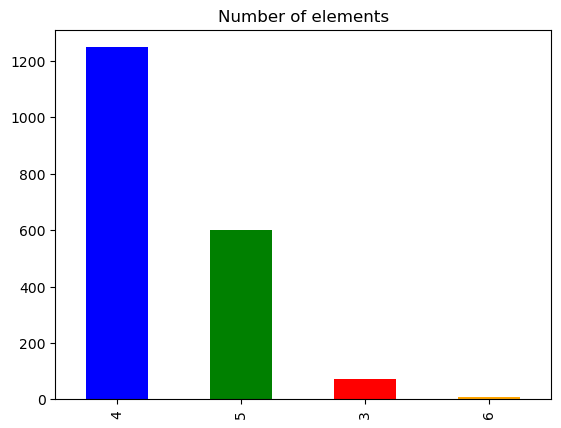

In [20]:
dataset['Number of elements'].value_counts().plot(kind='bar', color=['blue', 'green', 'red', 'orange'] ,title="Number of elements")

<Axes: xlabel='energy_above_hull (meV/atom)', ylabel='Count'>

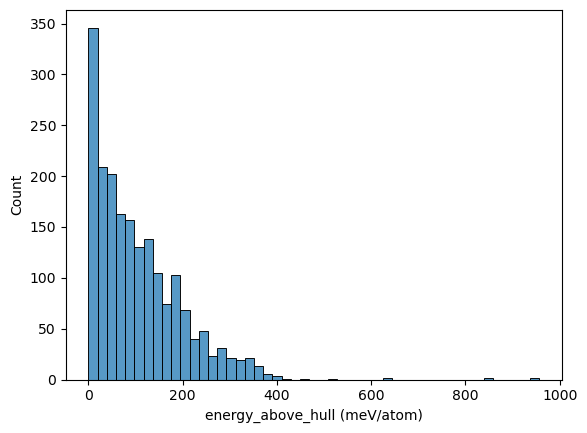

In [18]:
sns.histplot(dataset['energy_above_hull (meV/atom)'])

<Axes: xlabel='formation_energy (eV/atom)', ylabel='Count'>

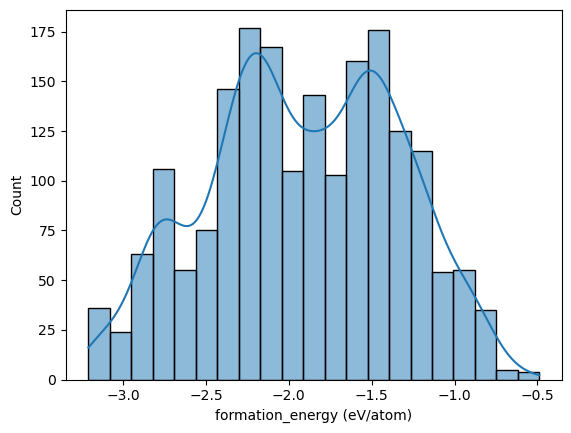

In [19]:
sns.histplot(dataset["formation_energy (eV/atom)"],kde = True)

In [8]:
hot_end_enc(dataset,"A site #2")

['Sr', 'Zn', 'Ca', 'Y', 'Ba', 'Pr', 'La']


,A site #2,Sr,Zn,Ca,Y,Ba,Pr,La
0,Sr,1,0,0,0,0,0,0
1,Bi,0,0,0,0,0,0,0
2,Ca,0,0,1,0,0,0,0
3,Cd,0,0,0,0,0,0,0
4,Dy,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
1924,NaN,0,0,0,0,0,0,0
1925,NaN,0,0,0,0,0,0,0
1926,NaN,0,0,0,0,0,0,0
1927,NaN,0,0,0,0,0,0,0


In [9]:
hot_end_enc(dataset,"A site #3")

['Zn', 'La', 'Pr', 'Sr']


,A site #3,Zn,La,Pr,Sr
0,NaN,0,0,0,0
1,Pr,0,0,1,0
2,NaN,0,0,0,0
3,Pr,0,0,1,0
4,NaN,0,0,0,0
...,...,...,...,...,...
1924,NaN,0,0,0,0
1925,NaN,0,0,0,0
1926,NaN,0,0,0,0
1927,NaN,0,0,0,0


In [10]:
hot_end_enc(dataset,"B site #1")

['Mn', 'Fe', 'Co', 'Ni', 'V', 'Ti', 'Sc']


,B site #1,Mn,Fe,Co,Ni,V,Ti,Sc
0,V,0,0,0,0,1,0,0
1,Co,0,0,1,0,0,0,0
2,Fe,0,1,0,0,0,0,0
3,Ni,0,0,0,1,0,0,0
4,Fe,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...
1924,V,0,0,0,0,1,0,0
1925,V,0,0,0,0,1,0,0
1926,V,0,0,0,0,1,0,0
1927,V,0,0,0,0,1,0,0


In [13]:
hot_end_enc(dataset,"B site #2")

['Co', 'Ni', 'Fe', 'Cr', 'Mn', 'V', 'Mg']


,B site #2,Co,Ni,Fe,Cr,Mn,V,Mg
0,NaN,0,0,0,0,0,0,0
1,NaN,0,0,0,0,0,0,0
2,NaN,0,0,0,0,0,0,0
3,NaN,0,0,0,0,0,0,0
4,NaN,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
1924,Co,1,0,0,0,0,0,0
1925,Cr,0,0,0,1,0,0,0
1926,Fe,0,0,1,0,0,0,0
1927,Ni,0,1,0,0,0,0,0


In [11]:
hot_end_enc(dataset,"B site #3")

['Fe', 'Hf', 'Co', 'Cu', 'Mo', 'Ni', 'W']


,B site #3,Fe,Hf,Co,Cu,Mo,Ni,W
0,NaN,0,0,0,0,0,0,0
1,NaN,0,0,0,0,0,0,0
2,NaN,0,0,0,0,0,0,0
3,NaN,0,0,0,0,0,0,0
4,NaN,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
1924,NaN,0,0,0,0,0,0,0
1925,NaN,0,0,0,0,0,0,0
1926,NaN,0,0,0,0,0,0,0
1927,NaN,0,0,0,0,0,0,0


In [12]:
dataset

,A site #1,A site #2,A site #3,B site #1,B site #2,B site #3,Number of elements,energy_above_hull (meV/atom),formation_energy (eV/atom),num_of_atoms_host_Asite0,...,Fe,Co,Ni,V,Ti,Sc,Hf,Cu,Mo,W
0,Ba,Sr,NaN,V,NaN,NaN,4,29.747707,-2.113335,7,...,0,0,0,1,0,0,0,0,0,0
1,Ba,Bi,Pr,Co,NaN,NaN,5,106.702335,-1.311863,4,...,0,0,0,0,0,0,0,0,0,0
2,Ba,Ca,NaN,Fe,NaN,NaN,4,171.608093,-1.435607,6,...,0,0,0,0,0,0,0,0,0,0
3,Ba,Cd,Pr,Ni,NaN,NaN,5,284.898190,-0.868639,4,...,0,0,0,0,0,0,0,0,0,0
4,Ba,Dy,NaN,Fe,NaN,NaN,4,270.007913,-1.746806,6,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1924,Y,NaN,NaN,V,Co,NaN,4,1.588513,-2.438274,8,...,0,0,0,1,0,0,0,0,0,0
1925,Y,NaN,NaN,V,Cr,NaN,4,0.000000,-2.509888,8,...,0,0,0,1,0,0,0,0,0,0
1926,Y,NaN,NaN,V,Fe,NaN,4,0.000000,-2.479151,8,...,0,0,0,1,0,0,0,0,0,0
1927,Y,NaN,NaN,V,Ni,NaN,4,0.000000,-2.441538,8,...,0,0,0,1,0,0,0,0,0,0


Text(0.5, 1.0, 'num_of_atoms_host_Asite0 Vs energy_above_hull (meV/atom)')

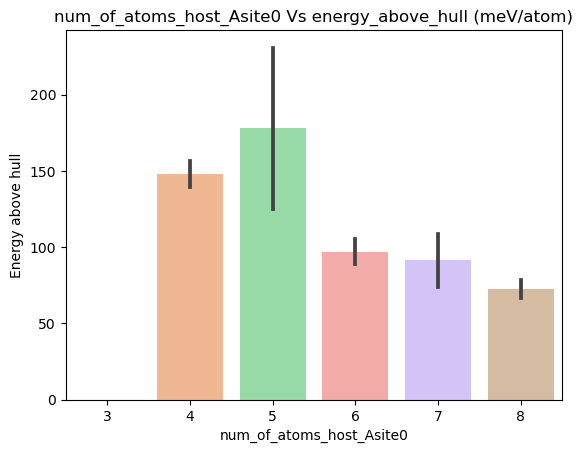

In [22]:
# Create the bar plot
sns.barplot(x=dataset["num_of_atoms_host_Asite0"], y=dataset["energy_above_hull (meV/atom)"], palette="pastel")

# Add labels and title
plt.xlabel("num_of_atoms_host_Asite0")
plt.ylabel("Energy above hull")
plt.title("num_of_atoms_host_Asite0 Vs energy_above_hull (meV/atom)")

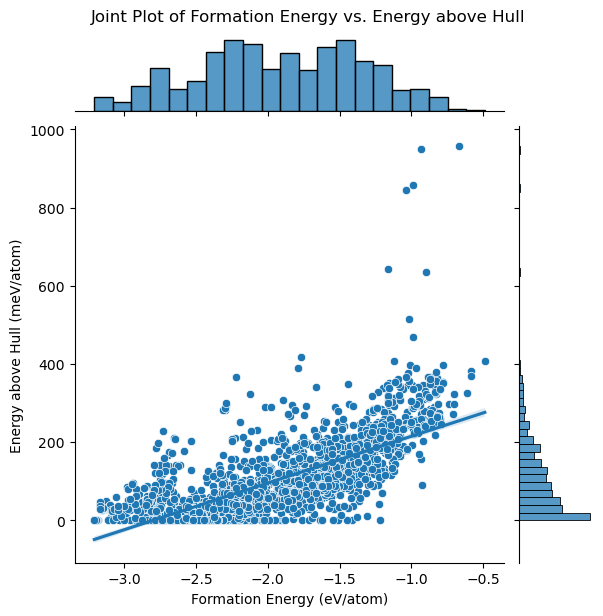

In [13]:
# Load your dataset into the 'dataset' variable

# Create the joint plot
joint_plot = sns.jointplot(x=dataset["formation_energy (eV/atom)"], y=dataset["energy_above_hull (meV/atom)"], palette="pastel")

# Add a regression line
sns.regplot(x=dataset["formation_energy (eV/atom)"], y=dataset["energy_above_hull (meV/atom)"], scatter=False, ax=joint_plot.ax_joint)

# Set labels and title
joint_plot.set_axis_labels("Formation Energy (eV/atom)", "Energy above Hull (meV/atom)")
joint_plot.fig.suptitle("Joint Plot of Formation Energy vs. Energy above Hull", y=1.02)

# Show the plot
plt.show()


Text(0.5, 1.0, 'Number of elements Vs energy_above_hull (meV/atom)')

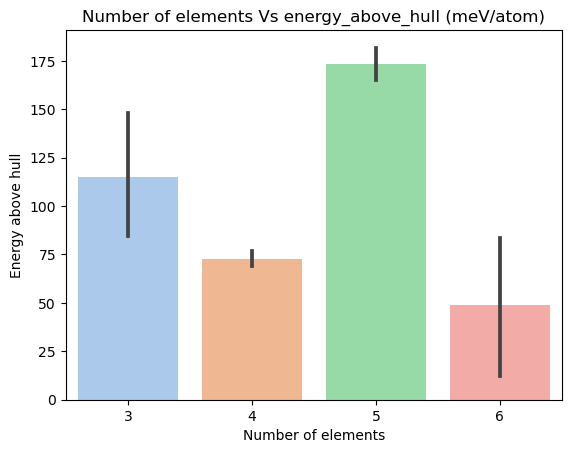

In [15]:
# Create the bar plot
sns.barplot(x=dataset["Number of elements"], y=dataset["energy_above_hull (meV/atom)"], palette="pastel")

# Add labels and title
plt.xlabel("Number of elements")
plt.ylabel("Energy above hull")
plt.title("Number of elements Vs energy_above_hull (meV/atom)")

In [16]:
# List of columns to be deleted
columns_to_delete = ['A site #1', 'A site #2', 'A site #3', 'B site #1', 'B site #2', 'B site #3']

# Drop the specified columns
dataset = dataset.drop(columns=columns_to_delete)

In [17]:
# Dataset after removal of categorical data

dataset

,Number of elements,energy_above_hull (meV/atom),formation_energy (eV/atom),num_of_atoms_host_Asite0,host_Asite0_Heat of Vaporization,host_Bsite0_at. wt.,host_Bsite0_Ionization Energy (kJ/mol),shannon_radii_AB_avg,Density_AB_avg,BCCefflatcnt_AB_avg,...,Ni,V,Ti,Sc,Cr,Mg,Hf,Cu,Mo,W
0,4,29.747707,-2.113335,7,136.90,50.9415,650.0,1.020625,4.390625,7.730568,...,0,0,0,0,0,0,0,0,0,0
1,5,106.702335,-1.311863,4,332.63,58.9332,758.0,0.912500,7.810000,7.066584,...,0,0,0,0,0,0,0,0,0,0
2,4,171.608093,-1.435607,6,154.67,55.8470,759.3,1.020750,4.967000,7.179786,...,0,0,0,0,0,0,0,0,0,0
3,5,284.898190,-0.868639,4,332.63,58.6934,736.7,0.905000,7.672500,6.929113,...,0,0,0,0,0,0,0,0,0,0
4,4,270.007913,-1.746806,6,230.00,55.8470,759.3,0.924375,7.592000,7.011255,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1924,4,1.588513,-2.438274,8,393.30,50.9415,650.0,0.824375,5.464375,6.959018,...,0,0,0,0,0,0,0,0,0,0
1925,4,0.000000,-2.509888,8,393.30,50.9415,650.0,0.825625,5.357500,6.966861,...,0,0,0,0,1,0,0,0,0,0
1926,4,0.000000,-2.479151,8,393.30,50.9415,650.0,0.830875,5.400250,6.962176,...,0,0,0,0,0,0,0,0,0,0
1927,4,0.000000,-2.441538,8,393.30,50.9415,650.0,0.821250,5.464375,6.957805,...,0,0,0,0,0,0,0,0,0,0


In [18]:
dataset.isnull().sum()

Number of elements                  0
energy_above_hull (meV/atom)        0
formation_energy (eV/atom)          0
num_of_atoms_host_Asite0            0
host_Asite0_Heat of Vaporization    0
                                   ..
Mg                                  0
Hf                                  0
Cu                                  0
Mo                                  0
W                                   0
Length: 74, dtype: int64

By applying hot end encoding for most frequently occuring elements we also get rid of null values

In [19]:
dataset.dtypes

Number of elements                    int64
energy_above_hull (meV/atom)        float64
formation_energy (eV/atom)          float64
num_of_atoms_host_Asite0              int64
host_Asite0_Heat of Vaporization    float64
                                     ...   
Mg                                    int32
Hf                                    int32
Cu                                    int32
Mo                                    int32
W                                     int32
Length: 74, dtype: object

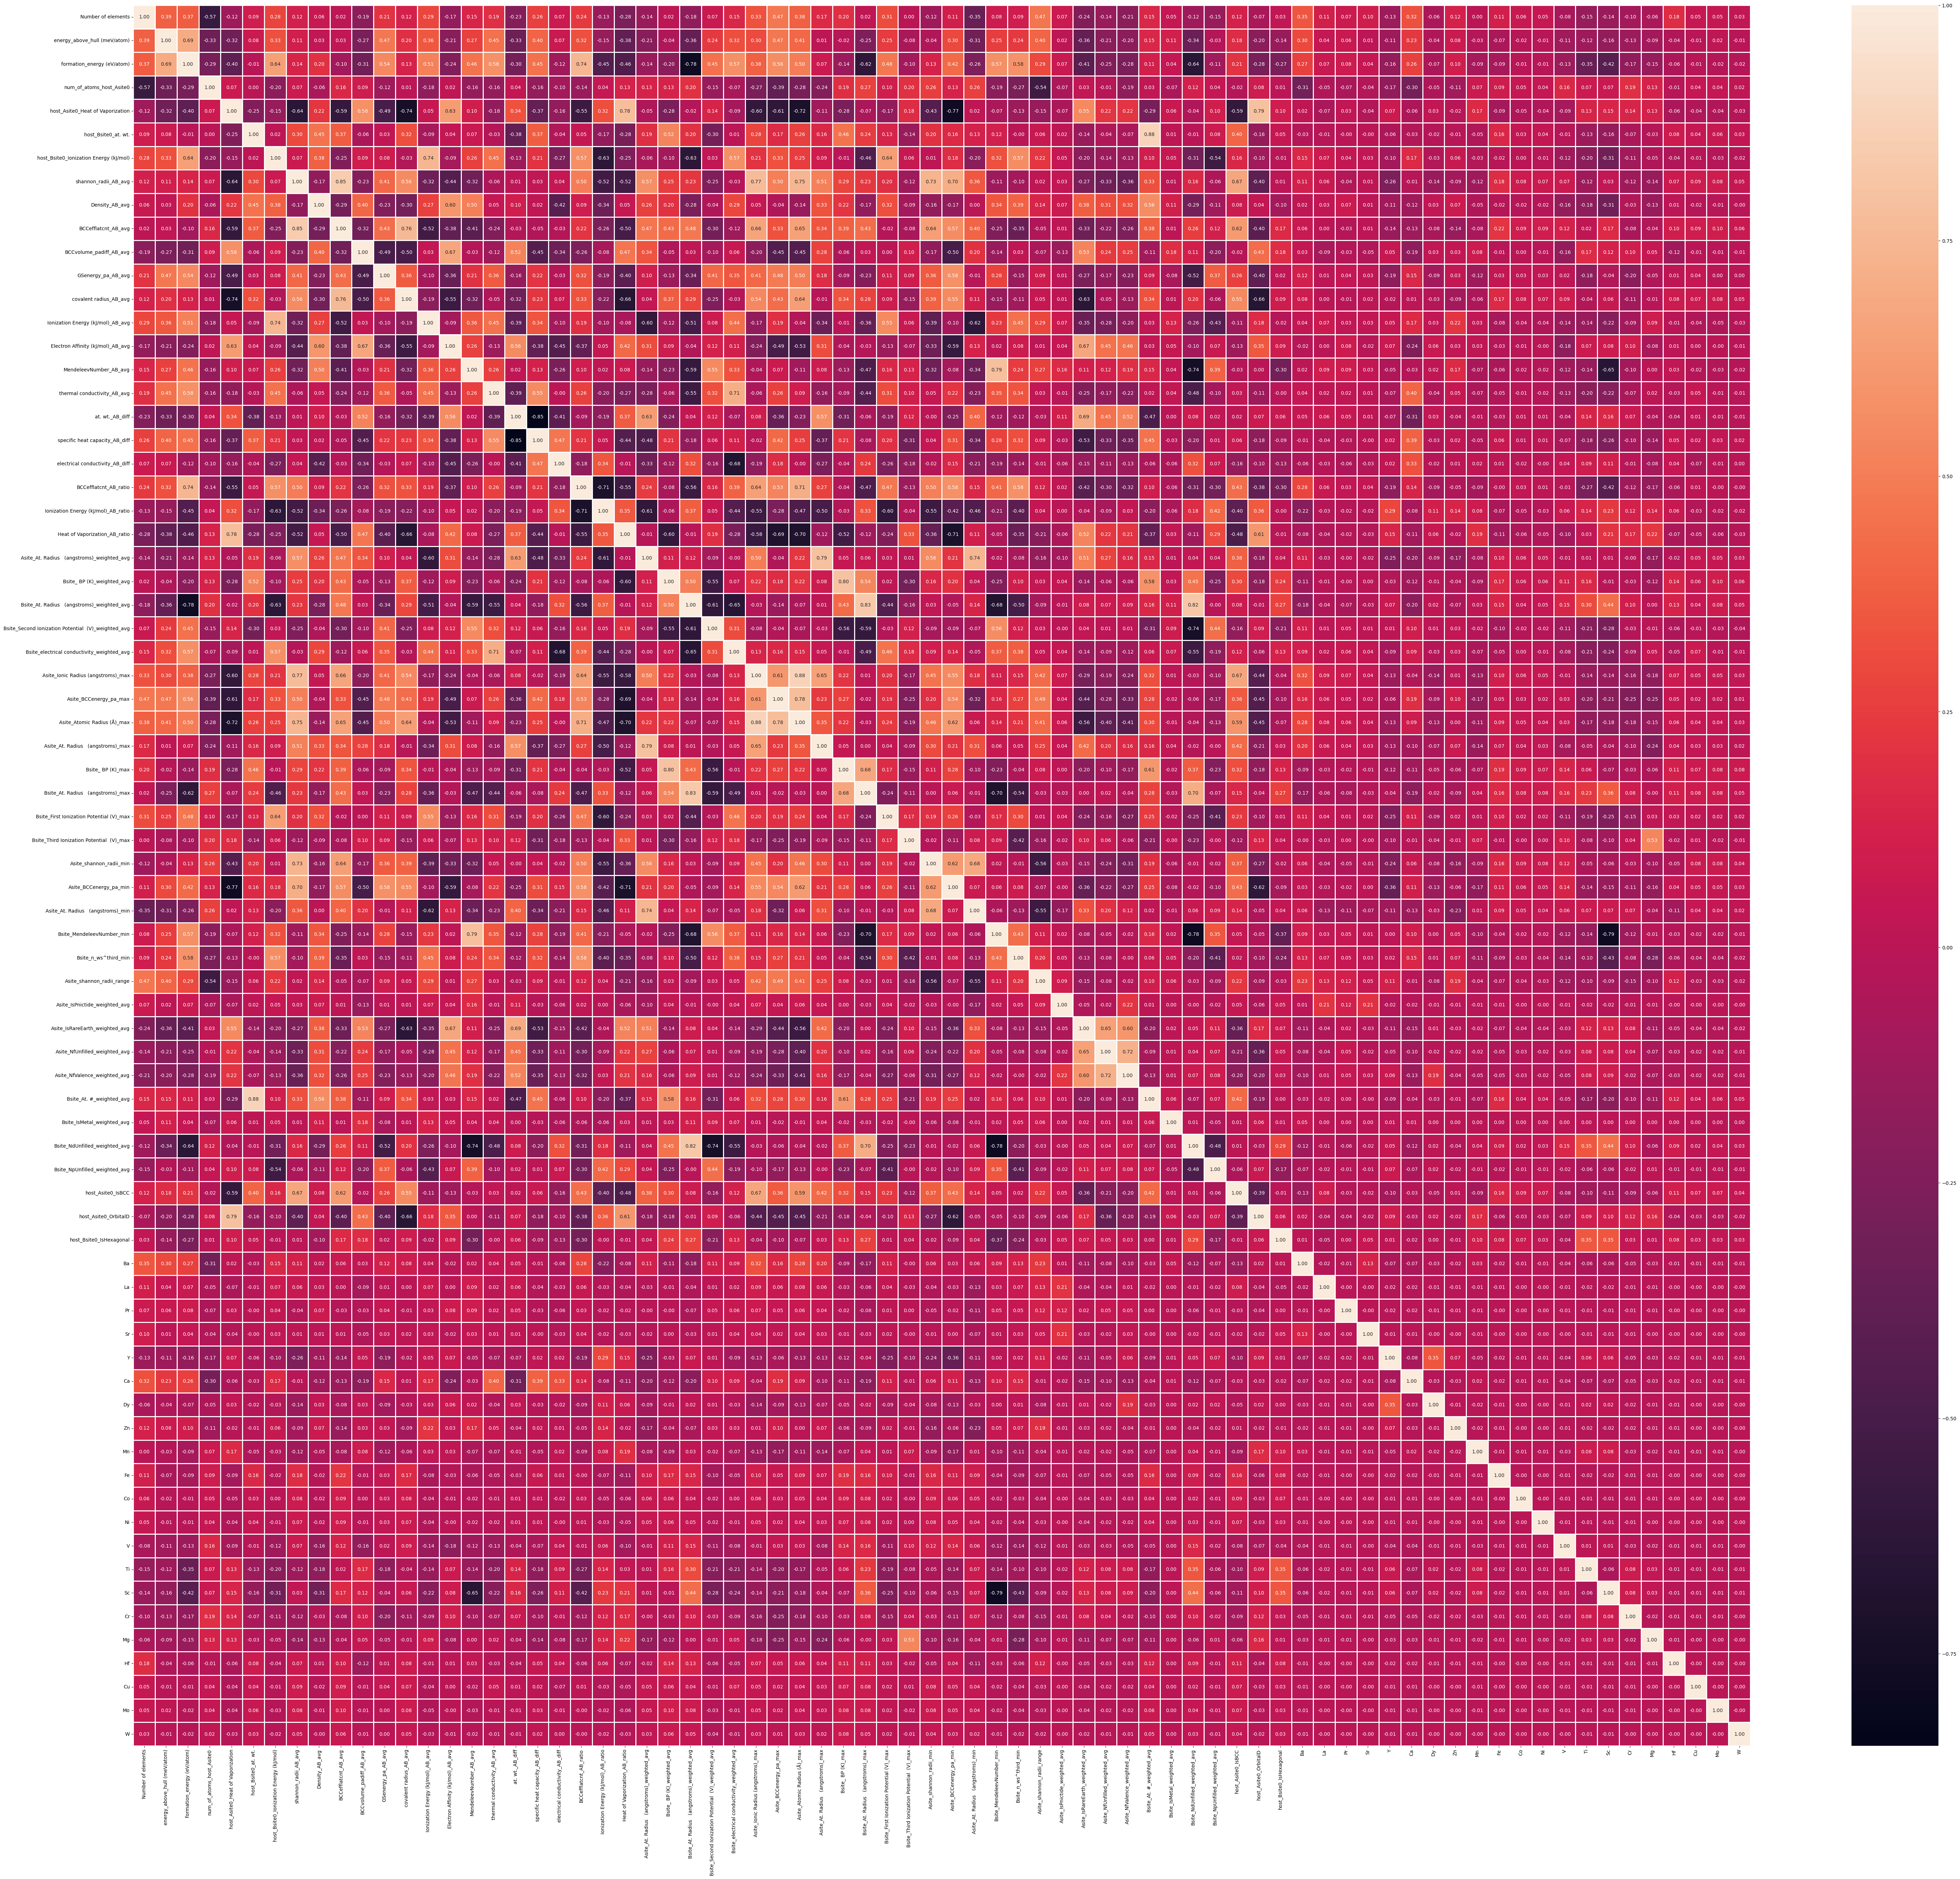

In [20]:
# Let's make our correlation matrix visual
corr_matrix=dataset.corr()
fig,ax=plt.subplots(figsize=(75,65))
ax=sns.heatmap(corr_matrix,
               annot=True,
               linewidths=1,
               fmt=".2f"
              )

In [21]:
# Define a function to convert continuous values to categories
def convert_to_stability(energy):
    if energy < 40:
        return "Stable"
    else:
        return "Unstable"

# Apply the function to create a new categorical column
dataset["stability"] = dataset["energy_above_hull (meV/atom)"].apply(convert_to_stability)

<Axes: title={'center': 'Stable and unstable compound'}>

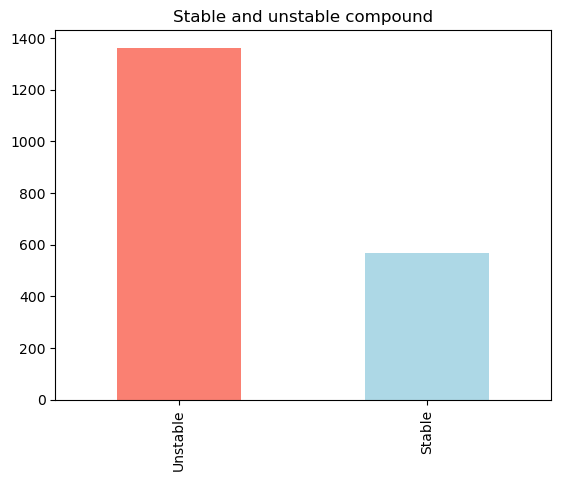

In [23]:
dataset['stability'].value_counts().plot(kind='bar',color=['salmon','lightblue'],title="Stable and unstable compound")

In [53]:
dataset

,Number of elements,energy_above_hull (meV/atom),formation_energy (eV/atom),num_of_atoms_host_Asite0,host_Asite0_Heat of Vaporization,host_Bsite0_at. wt.,host_Bsite0_Ionization Energy (kJ/mol),shannon_radii_AB_avg,Density_AB_avg,BCCefflatcnt_AB_avg,...,V,Ti,Sc,Cr,Mg,Hf,Cu,Mo,W,stability
0,4,29.747707,-2.113335,7,136.90,50.9415,650.0,1.020625,4.390625,7.730568,...,0,0,0,0,0,0,0,0,0,Stable
1,5,106.702335,-1.311863,4,332.63,58.9332,758.0,0.912500,7.810000,7.066584,...,0,0,0,0,0,0,0,0,0,Unstable
2,4,171.608093,-1.435607,6,154.67,55.8470,759.3,1.020750,4.967000,7.179786,...,0,0,0,0,0,0,0,0,0,Unstable
3,5,284.898190,-0.868639,4,332.63,58.6934,736.7,0.905000,7.672500,6.929113,...,0,0,0,0,0,0,0,0,0,Unstable
4,4,270.007913,-1.746806,6,230.00,55.8470,759.3,0.924375,7.592000,7.011255,...,0,0,0,0,0,0,0,0,0,Unstable
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1924,4,1.588513,-2.438274,8,393.30,50.9415,650.0,0.824375,5.464375,6.959018,...,0,0,0,0,0,0,0,0,0,Stable
1925,4,0.000000,-2.509888,8,393.30,50.9415,650.0,0.825625,5.357500,6.966861,...,0,0,0,1,0,0,0,0,0,Stable
1926,4,0.000000,-2.479151,8,393.30,50.9415,650.0,0.830875,5.400250,6.962176,...,0,0,0,0,0,0,0,0,0,Stable
1927,4,0.000000,-2.441538,8,393.30,50.9415,650.0,0.821250,5.464375,6.957805,...,0,0,0,0,0,0,0,0,0,Stable


In [54]:
dataset = dataset.drop(columns=["energy_above_hull (meV/atom)"])

In [55]:
dataset

,Number of elements,formation_energy (eV/atom),num_of_atoms_host_Asite0,host_Asite0_Heat of Vaporization,host_Bsite0_at. wt.,host_Bsite0_Ionization Energy (kJ/mol),shannon_radii_AB_avg,Density_AB_avg,BCCefflatcnt_AB_avg,BCCvolume_padiff_AB_avg,...,V,Ti,Sc,Cr,Mg,Hf,Cu,Mo,W,stability
0,4,-2.113335,7,136.90,50.9415,650.0,1.020625,4.390625,7.730568,-0.577500,...,0,0,0,0,0,0,0,0,0,Stable
1,5,-1.311863,4,332.63,58.9332,758.0,0.912500,7.810000,7.066584,-0.228750,...,0,0,0,0,0,0,0,0,0,Unstable
2,4,-1.435607,6,154.67,55.8470,759.3,1.020750,4.967000,7.179786,-0.356250,...,0,0,0,0,0,0,0,0,0,Unstable
3,5,-0.868639,4,332.63,58.6934,736.7,0.905000,7.672500,6.929113,0.078125,...,0,0,0,0,0,0,0,0,0,Unstable
4,4,-1.746806,6,230.00,55.8470,759.3,0.924375,7.592000,7.011255,-0.011250,...,0,0,0,0,0,0,0,0,0,Unstable
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1924,4,-2.438274,8,393.30,50.9415,650.0,0.824375,5.464375,6.959018,0.094687,...,0,0,0,0,0,0,0,0,0,Stable
1925,4,-2.509888,8,393.30,50.9415,650.0,0.825625,5.357500,6.966861,0.081250,...,0,0,0,1,0,0,0,0,0,Stable
1926,4,-2.479151,8,393.30,50.9415,650.0,0.830875,5.400250,6.962176,0.082500,...,0,0,0,0,0,0,0,0,0,Stable
1927,4,-2.441538,8,393.30,50.9415,650.0,0.821250,5.464375,6.957805,0.083125,...,0,0,0,0,0,0,0,0,0,Stable


In [58]:
# Target 
"""
def Target(x):
    if x in "Stable":
        return True
    else:
        return False
    
data_l = dataset["stability"].apply(Target)
dataset['stability'] = data_l
"""
dataset['stability']

0         Stable
1       Unstable
2       Unstable
3       Unstable
4       Unstable
          ...   
1924      Stable
1925      Stable
1926      Stable
1927      Stable
1928      Stable
Name: stability, Length: 1929, dtype: object

In [59]:
dataset.to_csv("processed table.csv")

now we will seperate the target variable and features

In [60]:
dataset1 = pd.read_csv("processed table.csv")
dataset1 = pd.DataFrame(dataset)
y = dataset1["stability"]
X = dataset.drop("stability",axis=1)

In [61]:
##Splitting data – Train test split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=4)
X_train.head()

,Number of elements,formation_energy (eV/atom),num_of_atoms_host_Asite0,host_Asite0_Heat of Vaporization,host_Bsite0_at. wt.,host_Bsite0_Ionization Energy (kJ/mol),shannon_radii_AB_avg,Density_AB_avg,BCCefflatcnt_AB_avg,BCCvolume_padiff_AB_avg,...,Ni,V,Ti,Sc,Cr,Mg,Hf,Cu,Mo,W
336,4,-1.762229,8,140.20,55.8470,759.3,1.121000,9.01350,7.965041,0.036250,...,0,0,0,0,0,0,0,0,0,0
694,5,-1.420590,4,399.57,58.9332,758.0,0.933750,6.37500,6.955011,-0.020000,...,0,0,0,0,0,0,0,0,0,0
630,4,-2.527249,6,393.30,50.9415,650.0,0.828500,5.80000,6.971430,0.058125,...,0,0,0,0,0,0,0,0,0,0
1428,5,-1.406944,4,136.90,55.8470,759.3,0.999000,5.08775,7.233337,-0.543125,...,0,0,0,0,0,0,0,0,0,0
72,5,-1.240287,4,140.20,58.9332,758.0,1.013625,5.55250,7.365403,-0.161573,...,0,0,0,0,0,0,0,0,0,0


Model Development

In [62]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm

In [63]:
lr=LogisticRegression(C = 0.1, random_state = 42, solver = 'liblinear')
dt=DecisionTreeClassifier()
rm=RandomForestClassifier()
gnb=GaussianNB()
knn = KNeighborsClassifier(n_neighbors=3)
svm = svm.SVC(kernel='linear')

In [64]:
for a,b in zip([lr,dt,knn,svm,rm,gnb],["Logistic Regression","Decision Tree","KNN","SVM","Random Forest","Naive Bayes"]):
    a.fit(X_train,y_train)
    prediction=a.predict(X_train)
    y_pred=a.predict(X_test)
    score1=accuracy_score(y_train,prediction)
    score=accuracy_score(y_test,y_pred)
    msg1="[%s] training data accuracy is : %f" % (b,score1)
    msg2="[%s] test data accuracy is : %f" % (b,score)
    print(msg1)
    print(msg2)

[Logistic Regression] training data accuracy is : 0.840570
[Logistic Regression] test data accuracy is : 0.839378
[Decision Tree] training data accuracy is : 1.000000
[Decision Tree] test data accuracy is : 0.898964
[KNN] training data accuracy is : 0.914452
[KNN] test data accuracy is : 0.834197
[SVM] training data accuracy is : 0.837978
[SVM] test data accuracy is : 0.839378
[Random Forest] training data accuracy is : 1.000000
[Random Forest] test data accuracy is : 0.901554
[Naive Bayes] training data accuracy is : 0.764744
[Naive Bayes] test data accuracy is : 0.759067


In [65]:
model_scores={'Logistic Regression':lr.score(X_test,y_test),
             'KNN classifier':knn.score(X_test,y_test),
             'Support Vector Machine':svm.score(X_test,y_test),
             'Random forest':rm.score(X_test,y_test),
              'Decision tree':dt.score(X_test,y_test),
              'Naive Bayes':gnb.score(X_test,y_test)
             }
model_scores

{'Logistic Regression': 0.8393782383419689,
 'KNN classifier': 0.8341968911917098,
 'Support Vector Machine': 0.8393782383419689,
 'Random forest': 0.9015544041450777,
 'Decision tree': 0.8989637305699482,
 'Naive Bayes': 0.7590673575129534}

random forrest have good accuracy.

In [66]:
# logistic regression

from sklearn.metrics import classification_report

lr_y_preds = lr.predict(X_test)

print(classification_report(y_test,lr_y_preds))

              precision    recall  f1-score   support

      Stable       0.75      0.70      0.72       116
    Unstable       0.87      0.90      0.89       270

    accuracy                           0.84       386
   macro avg       0.81      0.80      0.81       386
weighted avg       0.84      0.84      0.84       386



In [68]:
# random forest

from sklearn.metrics import classification_report

rm_y_preds = rm.predict(X_test)

print(classification_report(y_test,rm_y_preds))

              precision    recall  f1-score   support

      Stable       0.83      0.84      0.84       116
    Unstable       0.93      0.93      0.93       270

    accuracy                           0.90       386
   macro avg       0.88      0.89      0.88       386
weighted avg       0.90      0.90      0.90       386



In [67]:
import pickle

# Save the trained model as a pickle string.
saved_model = pickle.dumps(lr)

# Load the pickled model
lr_from_pickle = pickle.loads(saved_model)

# Use the loaded pickled model to make predictions
lr_from_pickle.predict(X_test)

array(['Unstable', 'Unstable', 'Stable', 'Unstable', 'Unstable', 'Stable',
       'Unstable', 'Unstable', 'Unstable', 'Unstable', 'Unstable',
       'Stable', 'Unstable', 'Stable', 'Unstable', 'Unstable', 'Unstable',
       'Unstable', 'Unstable', 'Unstable', 'Stable', 'Unstable', 'Stable',
       'Unstable', 'Unstable', 'Unstable', 'Unstable', 'Unstable',
       'Unstable', 'Stable', 'Stable', 'Unstable', 'Unstable', 'Unstable',
       'Unstable', 'Unstable', 'Unstable', 'Unstable', 'Stable', 'Stable',
       'Unstable', 'Unstable', 'Stable', 'Unstable', 'Unstable',
       'Unstable', 'Unstable', 'Unstable', 'Stable', 'Stable', 'Unstable',
       'Unstable', 'Stable', 'Unstable', 'Unstable', 'Unstable',
       'Unstable', 'Unstable', 'Unstable', 'Unstable', 'Unstable',
       'Unstable', 'Stable', 'Unstable', 'Stable', 'Unstable', 'Unstable',
       'Unstable', 'Unstable', 'Unstable', 'Stable', 'Unstable', 'Stable',
       'Unstable', 'Unstable', 'Unstable', 'Stable', 'Unstable', 'Sta